In [2]:
from shapely.geometry import Polygon
import geopandas as gpd

poly = Polygon([(0,0),(0,1),(1,1),(1,0)])
def is_ccw(polygon):
    return polygon.exterior.is_ccw
# poly
print(is_ccw(poly))  # True if CCW

# Save as GeoJSON using GeoPandas
gdf = gpd.GeoDataFrame([{'geometry': poly}])
gdf.to_file("polygon2.geojson", driver="GeoJSON")

print("Saved to polygon.geojson")

False
Saved to polygon.geojson


c:\Users\TECHCRAFT-QDThang\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\geopandas.py:710: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


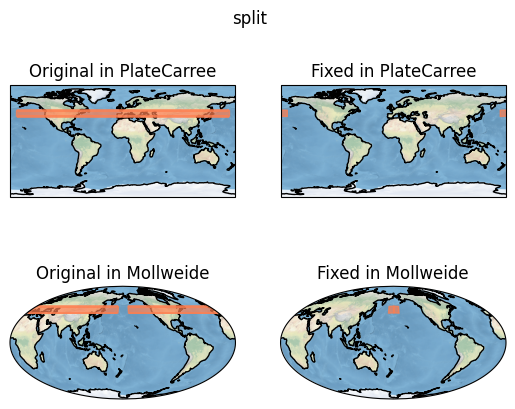

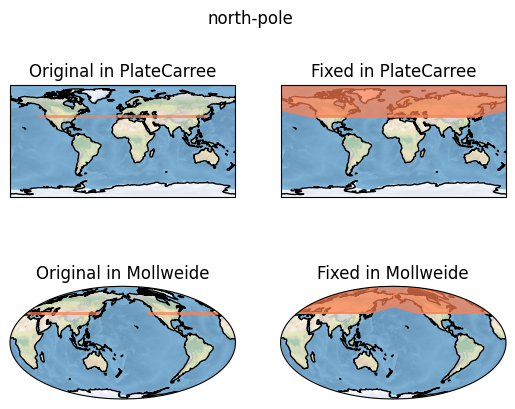

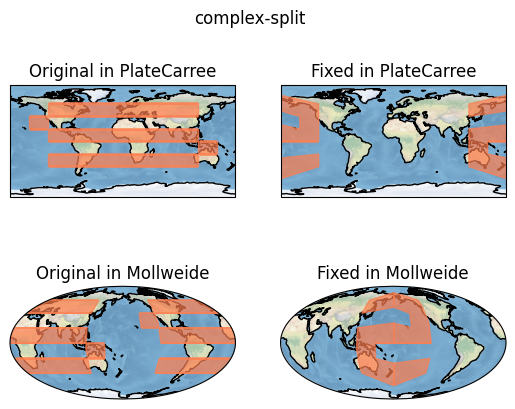

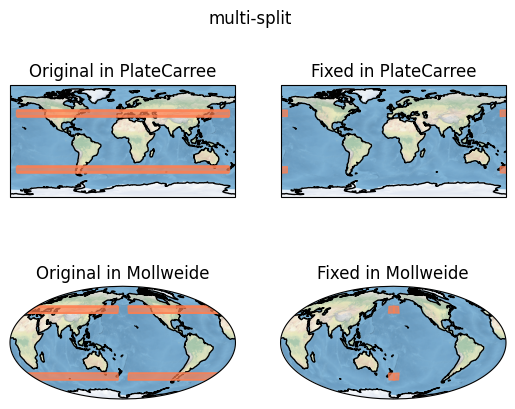

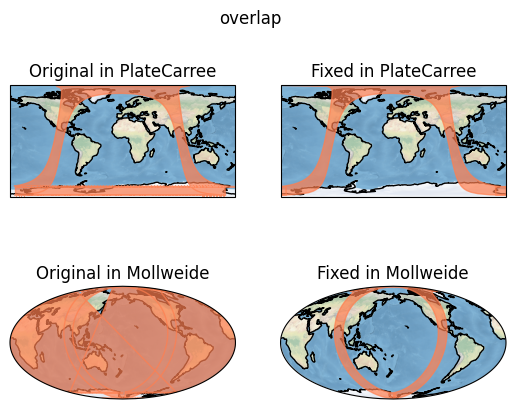

In [4]:
import json
import warnings
from pathlib import Path
from typing import Any, Dict, Optional

import shapely.geometry
from cartopy.crs import Mollweide, PlateCarree
from cartopy.io import DownloadWarning
from matplotlib import pyplot

import antimeridian

warnings.filterwarnings("ignore", category=DownloadWarning)


def read_json(path: Path) -> Dict[str, Any]:
    with open(path) as f:
        return json.load(f)


def plot(name: str, fix_winding: bool = True, suptitle: Optional[str] = None) -> None:
    data = read_json(f"./test_data/input/{name}.json")
    input = shapely.geometry.shape(data)
    output = shapely.geometry.shape(
        antimeridian.fix_geojson(data, fix_winding=fix_winding)
    )

    if suptitle is None:
        suptitle = name

    figure = pyplot.figure()
    figure.suptitle(suptitle)

    axes = figure.add_subplot(2, 2, 1, projection=PlateCarree())
    axes.set_title("Original in PlateCarree")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(input, crs=PlateCarree(), color="coral", alpha=0.7)

    axes = figure.add_subplot(2, 2, 2, projection=PlateCarree())
    axes.set_title("Fixed in PlateCarree")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(output, crs=PlateCarree(), color="coral", alpha=0.7)

    axes = figure.add_subplot(2, 2, 3, projection=Mollweide(central_longitude=180))
    axes.set_title("Original in Mollweide")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(input, crs=PlateCarree(), color="coral", alpha=0.7)

    axes = figure.add_subplot(2, 2, 4, projection=Mollweide(central_longitude=180))
    axes.set_title("Fixed in Mollweide")
    axes.stock_img()
    axes.coastlines()
    axes.add_geometries(output, crs=PlateCarree(), color="coral", alpha=0.7)

    pyplot.show()


for name in [
    "split",
    "north-pole",
    "complex-split",
    "multi-split",
    "overlap",
]:
    plot(name)